# Lab 11-0-1 CNN Basic: Convolution
- image Classification에 널리 쓰인다.
- Convolution Layer, Pooling layer, Fully-connected Layer로 구성
    - Conv Layer, Pooling Layer : feature extraction(특징 뽑아내기)
    - Fully-connected Layer : classification(분류)


## 2D Conv Layer
- 32 * 32 * 3 image 
- 5 * 5 * 3 filter
    - Filter는 항상 input의 volumn(channel)을 channel로 이어 받는다.
- Filter는 여러 개인 경우가 많다.
    - 예를 들어 첫 번째 Filter는 파란색을 찾는 filter, 두 번째 필터는 뾰족한 것을 찾는 filter 등..

### tf.keras.layers.Conv2D
- filters : integer, output의 크기 설정
- kernel_size : integer나 tuple, list 형식으로 conv layer의 크기 설정
- stride : integer나 tuple, list 형식으로 stride 설정
- padding : valid나 same
- data_format : channels_last(default) 또는 channels_first
    - channel_last : batch, height, width, channels
    - channel_first : batch, channels, height, width
- activation : Activation function
- use_bias : Boolean, bias vector를 사용할 것인지
- kernel_initializer : kernel weight 행렬을 초기화 형식
- bias_initializer : bias vector 초기화 형식
- kernel_regularizer : kernel weight 최적화 형식(ex. L2 regularization)
- bias_regularizer : bias vector 최적화 형식

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


(1, 3, 3, 1)


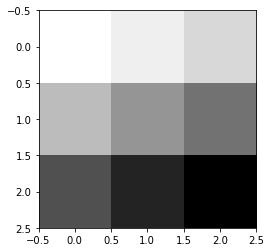

In [3]:
# gray scale
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape) # (bacth, height, width, channel) # channel = 1은 gray scale 의미
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

#### 1 filter (2, 2, 1, 1) with padding : VALID
- 패딩을 하지 않겠다는 것

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


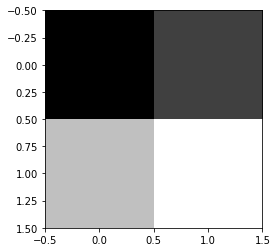

In [4]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

#### 1 filter (2, 2, 1, 1) with padding : SAME
- stride가 1일 때를 기준으로, 입력 갯수와 출력 갯수를 같게 맞추는 것

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


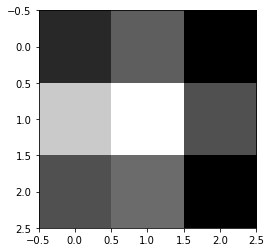

In [5]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
onv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

### 3 Filter (2, 2, 1, 3)
- (height, width, channel, # of filters)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


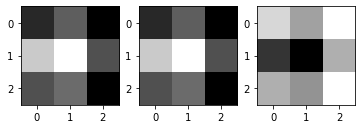

In [6]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

# Lab 11-0-2 CNN Basic : Pooling

### Max Pooling
- 이외에 Average Pooling이 있다.(평균값을 출력값으로 이용)
- 보통은 Max Pooling을 더 쓴다.
    - Conv Filter가 원하는 Feature를 (큰 값이 있는) 해당 위치에서 찾을 가능성이 더 크다는 것을 의미하는 것이기 때문

#### tf.keras.layers.MaxPool2D
```python
__init(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)
```

In [7]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


### SAME : Zero paddings

In [8]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## MNIST로 실습

In [9]:
# MNIST
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
# set Train images and test images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

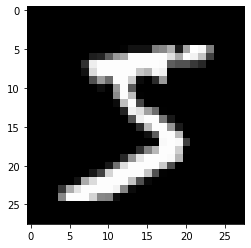

In [12]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


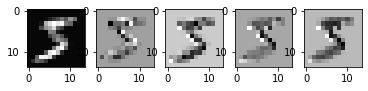

In [13]:
img = img.reshape(-1,28,28,1) # Conv 연산을 하려면 4차원으로 바꿔줘야 함
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', 
                             kernel_initializer=weight_init)(img)
print(conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


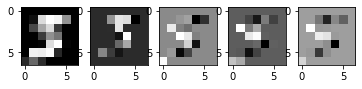

In [14]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

### Fully Connected(Dense) Layer